In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

In [35]:
df_dr3_full = pd.read_csv("/data/praveen/results/dr3_full.csv")

In [36]:
df_dr3_full_predicted_inverted = pd.read_csv("/data/praveen/results/dr3_full_predicted_inverted.csv")

In [37]:
df_dr3_predicted = 1 - df_dr3_full_predicted_inverted

In [38]:
df_dr3_predicted.head()

,0,1,2,3,4,5,6,7,8,9,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
0,0.999294,1.000770,1.000356,0.999640,1.000050,1.000876,0.999878,0.999918,1.000170,1.000392,...,0.999244,0.999872,0.999787,0.999909,0.999128,0.999669,0.999264,1.000809,0.999230,1.000937
1,0.999290,1.000219,1.000747,0.999470,0.999177,1.000009,0.999414,0.999451,1.000094,1.000656,...,0.999918,1.000362,1.000344,1.000076,0.999336,1.000703,0.999284,1.000406,0.999878,0.999794
2,0.999029,1.000251,1.000652,0.999220,0.999459,1.000482,0.999738,0.999624,0.999609,1.000594,...,0.999600,1.000088,0.999845,0.999934,0.999300,1.000617,0.999669,1.000779,0.999571,1.000243
3,0.998912,1.000359,1.000646,0.999807,0.999493,1.000113,0.999827,0.999144,0.999081,1.000589,...,0.999914,1.000373,1.000424,0.999850,0.999540,1.000289,0.999981,1.000651,0.999938,1.000111
4,0.999310,1.000478,1.000466,0.999791,0.999643,1.000235,0.999533,0.999430,0.999366,1.000537,...,0.999862,1.000177,1.000386,0.999695,0.999765,1.000514,0.999723,1.000678,0.999263,1.000651


In [39]:
df_dr3_predicted["sobject_id"]=df_dr3_full["sobject_id"]

In [40]:
df_dr3_predicted.head()

,0,1,2,3,4,5,6,7,8,9,...,4450,4451,4452,4453,4454,4455,4456,4457,4458,sobject_id
0,0.999294,1.000770,1.000356,0.999640,1.000050,1.000876,0.999878,0.999918,1.000170,1.000392,...,0.999872,0.999787,0.999909,0.999128,0.999669,0.999264,1.000809,0.999230,1.000937,131116000501002
1,0.999290,1.000219,1.000747,0.999470,0.999177,1.000009,0.999414,0.999451,1.000094,1.000656,...,1.000362,1.000344,1.000076,0.999336,1.000703,0.999284,1.000406,0.999878,0.999794,131116000501004
2,0.999029,1.000251,1.000652,0.999220,0.999459,1.000482,0.999738,0.999624,0.999609,1.000594,...,1.000088,0.999845,0.999934,0.999300,1.000617,0.999669,1.000779,0.999571,1.000243,131116000501005
3,0.998912,1.000359,1.000646,0.999807,0.999493,1.000113,0.999827,0.999144,0.999081,1.000589,...,1.000373,1.000424,0.999850,0.999540,1.000289,0.999981,1.000651,0.999938,1.000111,131116000501006
4,0.999310,1.000478,1.000466,0.999791,0.999643,1.000235,0.999533,0.999430,0.999366,1.000537,...,1.000177,1.000386,0.999695,0.999765,1.000514,0.999723,1.000678,0.999263,1.000651,131116000501007


In [ ]:
dr3_ews = pd.read_csv("/data/praveen/results/dr3_difference_non_inverted_masked_ew.csv")

In [9]:
import h5py
hf_grid = h5py.File("/data/praveen/wl_grid.h5","r")
wl_grid = np.array(hf_grid["wl_grid"])

In [10]:
PLOT_MASK = range(1475,1545)

In [42]:
df_dr3_full.loc[df_dr3_full["sobject_id"]==170509005701009]

,sobject_id,0,1,2,3,4,5,6,7,8,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
476622,170509005701009,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
PLOT_INDEX=476622

In [44]:
df_dr3_full_data_only = df_dr3_full.drop('sobject_id',1)

/tmp/ipykernel_21788/3415360606.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_dr3_full_data_only = df_dr3_full.drop('sobject_id',1)


In [45]:
df_dr3_full_data_only.head()

,0,1,2,3,4,5,6,7,8,9,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [46]:
df_dr3_predicted_data_only = df_dr3_predicted.drop('sobject_id',1)

/tmp/ipykernel_21788/697268539.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_dr3_predicted_data_only = df_dr3_predicted.drop('sobject_id',1)


In [47]:
df_dr3_predicted_data_only.head()

,0,1,2,3,4,5,6,7,8,9,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
0,0.999294,1.000770,1.000356,0.999640,1.000050,1.000876,0.999878,0.999918,1.000170,1.000392,...,0.999244,0.999872,0.999787,0.999909,0.999128,0.999669,0.999264,1.000809,0.999230,1.000937
1,0.999290,1.000219,1.000747,0.999470,0.999177,1.000009,0.999414,0.999451,1.000094,1.000656,...,0.999918,1.000362,1.000344,1.000076,0.999336,1.000703,0.999284,1.000406,0.999878,0.999794
2,0.999029,1.000251,1.000652,0.999220,0.999459,1.000482,0.999738,0.999624,0.999609,1.000594,...,0.999600,1.000088,0.999845,0.999934,0.999300,1.000617,0.999669,1.000779,0.999571,1.000243
3,0.998912,1.000359,1.000646,0.999807,0.999493,1.000113,0.999827,0.999144,0.999081,1.000589,...,0.999914,1.000373,1.000424,0.999850,0.999540,1.000289,0.999981,1.000651,0.999938,1.000111
4,0.999310,1.000478,1.000466,0.999791,0.999643,1.000235,0.999533,0.999430,0.999366,1.000537,...,0.999862,1.000177,1.000386,0.999695,0.999765,1.000514,0.999723,1.000678,0.999263,1.000651


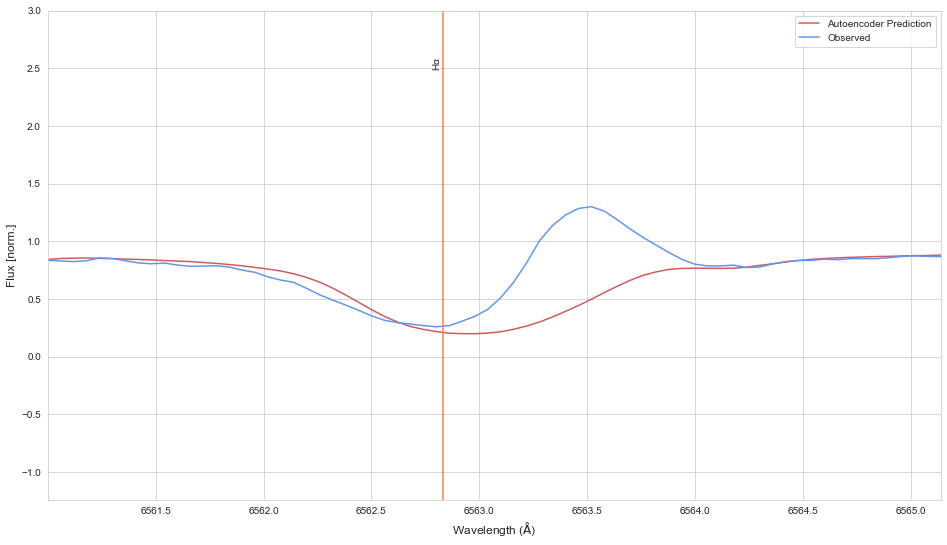

In [54]:
f, ax = plt.subplots(figsize=(16,9))
ax.plot(wl_grid[PLOT_MASK], df_dr3_predicted_data_only.loc[PLOT_INDEX,:][PLOT_MASK], color="indianred", lw=1.5, label="Autoencoder Prediction")
ax.plot(wl_grid[PLOT_MASK], df_dr3_full_data_only.loc[PLOT_INDEX,:][PLOT_MASK], color="cornflowerblue", lw=1.5,label="Observed")
plt.axvline(x=6562.83, color='coral')
ax.text(6562.78,2.5,"Hα", rotation=90)
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim((df_dr3_full_data_only.loc[PLOT_INDEX,:][PLOT_MASK].min()- 1.50),3)
ax.set_xlim(wl_grid[PLOT_MASK].min(), wl_grid[PLOT_MASK].max() )
ax.legend()
plt.show()